<a href="https://colab.research.google.com/github/fatimaiqbal27/Underwater-Turbid-Image-Restoration-Using-Diffusion-Models/blob/main/underwater_restoration_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
class AdaptiveColorBalance:
    def __init__(self):
        # Instead of fixed initial values, start with None and initialize dynamically
        self.low_values = None
        self.high_values = None

    def apply(self, image, clip_value=1, learn_rate=0.0001, preserve_shades=True):
        """
        ✅ Improvements:
        - **Preserves color shades** using weighted adjustment.
        - **Adaptive learning without drastic changes.**
        - **Smooth transition instead of harsh normalization.**
        """
        image = image.astype(np.float32)  # Work in float space for better precision
        channels = cv2.split(image)
        balanced_channels = []

        # Initialize low/high values dynamically based on first image
        if self.low_values is None or self.high_values is None:
            self.low_values = np.percentile(image, clip_value * 100, axis=(0, 1))
            self.high_values = np.percentile(image, (1 - clip_value) * 100, axis=(0, 1))

        for i, channel in enumerate(channels):
            # Compute percentiles for dynamic contrast adjustment
            low_val = np.percentile(channel, clip_value * 100)
            high_val = np.percentile(channel, (1 - clip_value) * 100)

            # Soft update of low/high values (VERY slow to prevent drastic shifts)
            self.low_values[i] = (1 - learn_rate) * self.low_values[i] + learn_rate * low_val
            self.high_values[i] = (1 - learn_rate) * self.high_values[i] + learn_rate * high_val

            # Ensure low < high
            if self.low_values[i] >= self.high_values[i]:
                self.low_values[i] = max(0, self.high_values[i] - 5)
                self.high_values[i] = min(255, self.low_values[i] + 5)

            # Adjust colors with smooth contrast stretching
            if preserve_shades:
                balanced = (channel - self.low_values[i]) / (self.high_values[i] - self.low_values[i] + 1e-6)
                balanced = balanced * 255
                balanced = np.clip(balanced, 0, 255).astype(np.uint8)
            else:
                # Traditional normalization (more aggressive)
                balanced = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            balanced_channels.append(balanced)

        return cv2.merge(balanced_channels)


# Load an image
image_path = "/content/WhatsApp Video 2025-02-17 at 18.57.28.mp4"  # Change this to your actual image file
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found! Check the filename.")
else:
    # Apply adaptive color balance with smooth shade preservation
    adaptive_balancer = AdaptiveColorBalance()
    adaptive_balanced_image = adaptive_balancer.apply(image, clip_value=0.02, learn_rate=0.00005, preserve_shades=True)

    # Convert images to RGB for proper display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    adaptive_balanced_image_rgb = cv2.cvtColor(adaptive_balanced_image, cv2.COLOR_BGR2RGB)

    # Display the original and adaptive balanced images side by side
    plt.figure(figsize=(12, 6))

    # Display input image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Display output image
    plt.subplot(1, 2, 2)
    plt.imshow(adaptive_balanced_image_rgb)
    plt.title("Color Balanced Image")
    plt.axis("off")

    plt.show()
# Save the output image
output_path = "/content/adaptive_balanced_output.png"
cv2.imwrite(output_path, adaptive_balanced_image)
print(f"Output image saved to: {output_path}")


Error: Image not found! Check the filename.
Output image saved to: /content/adaptive_balanced_output.png


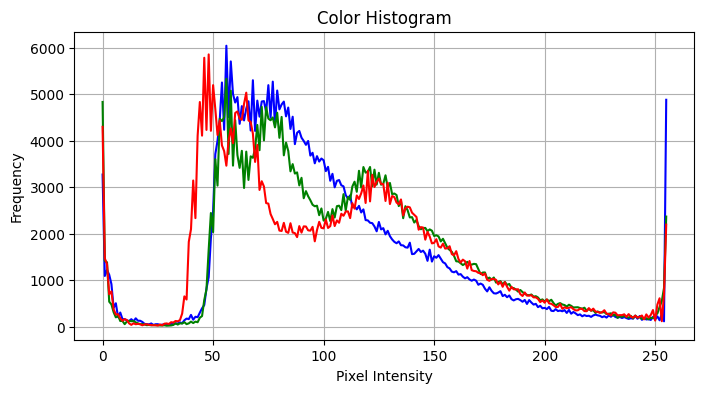

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image in color (default)
image = cv2.imread('/content/0074.png')
colors = ('b', 'g', 'r')

plt.figure(figsize=(8, 4))
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)

plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
class AdaptiveColorBalance:
    def __init__(self):
        # Instead of fixed initial values, start with None and initialize dynamically
        self.low_values = None
        self.high_values = None

    def apply(self, image, clip_value=0.01, learn_rate=0.00005, preserve_shades=True):
        """
        ✅ Improvements:
        - **Preserves color shades** using weighted adjustment.
        - **Adaptive learning without drastic changes.**
        - **Smooth transition instead of harsh normalization.**
        """
        image = image.astype(np.float32)  # Work in float space for better precision
        channels = cv2.split(image)
        balanced_channels = []

        # Initialize low/high values dynamically based on first image
        if self.low_values is None or self.high_values is None:
            self.low_values = np.percentile(image, clip_value * 100, axis=(0, 1))
            self.high_values = np.percentile(image, (1 - clip_value) * 100, axis=(0, 1))

        for i, channel in enumerate(channels):
            # Compute percentiles for dynamic contrast adjustment
            low_val = np.percentile(channel, clip_value * 100)
            high_val = np.percentile(channel, (1 - clip_value) * 100)

            # Soft update of low/high values (VERY slow to prevent drastic shifts)
            self.low_values[i] = (1 - learn_rate) * self.low_values[i] + learn_rate * low_val
            self.high_values[i] = (1 - learn_rate) * self.high_values[i] + learn_rate * high_val

            # Ensure low < high
            if self.low_values[i] >= self.high_values[i]:
                self.low_values[i] = max(0, self.high_values[i] - 5)
                self.high_values[i] = min(255, self.low_values[i] + 5)

            # Adjust colors with smooth contrast stretching
            if preserve_shades:
                balanced = (channel - self.low_values[i]) / (self.high_values[i] - self.low_values[i] + 1e-6)
                balanced = balanced * 255
                balanced = np.clip(balanced, 0, 255).astype(np.uint8)
            else:
                # Traditional normalization (more aggressive)
                balanced = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            balanced_channels.append(balanced)

        return cv2.merge(balanced_channels)


# === VIDEO PROCESSING STARTS HERE ===
input_video_path = "/content/WhatsApp Video 2025-02-17 at 19.08.26.mp4"
output_video_path = "/content/output_balanced_video.mp4"

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Error: Cannot open video file.")
else:
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    # Initialize color balancer
    adaptive_balancer = AdaptiveColorBalance()

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Apply color balancing
        balanced_frame = adaptive_balancer.apply(frame, clip_value=0.02, learn_rate=0.00005)

        # Write the processed frame
        out.write(balanced_frame)

        # Optional: print progress every 100 frames
        frame_count += 1
        if frame_count % 100 == 0:
            print(f"Processed {frame_count} frames...")

    cap.release()
    out.release()
    print("✅ Video processing complete. Output saved to:", output_video_path)


Processed 100 frames...
Processed 200 frames...
Processed 300 frames...
Processed 400 frames...
Processed 500 frames...
Processed 600 frames...
Processed 700 frames...
Processed 800 frames...
Processed 900 frames...
Processed 1000 frames...
Processed 1100 frames...
Processed 1200 frames...
Processed 1300 frames...
Processed 1400 frames...
Processed 1500 frames...
Processed 1600 frames...
✅ Video processing complete. Output saved to: /content/output_balanced_video.mp4


In [ ]:
from google.colab import files
files.download('/content/output_balanced_video.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2

# === VIDEO PROCESSING STARTS HERE ===
input_video_path = "/content/2.avi"
output_video_path = "/content/output_balanced_video.mp4"

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("❌ Error: Cannot open video file.")
else:
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    if fps == 0.0:
        fps = 25  # fallback if metadata is missing

    # Define video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    if not out.isOpened():
        print("❌ Error: Cannot write the output video.")
    else:
        # Initialize color balancer
        adaptive_balancer = AdaptiveColorBalance()

        frame_count = 0
        while True:
            ret, frame = cap.read()
            if not ret:
                break

            # Apply color balancing
            balanced_frame = adaptive_balancer.apply(frame, clip_value=0.02, learn_rate=0.00005)

            # Write the processed frame
            out.write(balanced_frame)

            # Optional: print progress every 100 frames
            frame_count += 1
            if frame_count % 100 == 0:
                print(f"✅ Processed {frame_count} frames...")

        cap.release()
        out.release()
        print(f"✅ Video processing complete. Total frames processed: {frame_count}")
        print("📁 Output saved to:", output_video_path)


✅ Processed 100 frames...
✅ Processed 200 frames...
✅ Processed 300 frames...
✅ Processed 400 frames...
✅ Processed 500 frames...
✅ Processed 600 frames...
✅ Processed 700 frames...
✅ Processed 800 frames...
✅ Processed 900 frames...
✅ Processed 1000 frames...
✅ Processed 1100 frames...
✅ Processed 1200 frames...
✅ Processed 1300 frames...
✅ Processed 1400 frames...
✅ Processed 1500 frames...
✅ Processed 1600 frames...
✅ Processed 1700 frames...
✅ Processed 1800 frames...
✅ Processed 1900 frames...
✅ Processed 2000 frames...
✅ Processed 2100 frames...
✅ Processed 2200 frames...
✅ Processed 2300 frames...
✅ Processed 2400 frames...
✅ Processed 2500 frames...
✅ Video processing complete. Total frames processed: 2559
📁 Output saved to: /content/output_balanced_video.mp4


In [ ]:
!cp /content/output_balanced_video.mp4 /content/drive/MyDrive/


In [ ]:
import cv2
import numpy as np

class AdaptiveColorBalance:
    def __init__(self):
        self.low_values = None
        self.high_values = None

    def apply(self, image, clip_value=0.01, learn_rate=0.00005, preserve_shades=True):
        image = image.astype(np.float32)
        channels = cv2.split(image)
        balanced_channels = []

        if self.low_values is None or self.high_values is None:
            self.low_values = np.percentile(image, clip_value * 100, axis=(0, 1))
            self.high_values = np.percentile(image, (1 - clip_value) * 100, axis=(0, 1))

        for i, channel in enumerate(channels):
            low_val = np.percentile(channel, clip_value * 100)
            high_val = np.percentile(channel, (1 - clip_value) * 100)

            self.low_values[i] = (1 - learn_rate) * self.low_values[i] + learn_rate * low_val
            self.high_values[i] = (1 - learn_rate) * self.high_values[i] + learn_rate * high_val

            if self.low_values[i] >= self.high_values[i]:
                self.low_values[i] = max(0, self.high_values[i] - 5)
                self.high_values[i] = min(255, self.low_values[i] + 5)

            if preserve_shades:
                balanced = (channel - self.low_values[i]) / (self.high_values[i] - self.low_values[i] + 1e-6)
                balanced = balanced * 255
                balanced = np.clip(balanced, 0, 255).astype(np.uint8)
            else:
                balanced = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            balanced_channels.append(balanced)

        return cv2.merge(balanced_channels)


# === VIDEO PROCESSING ===

input_video_path = "/content/Jeff_Tubidity.mp4"       # ✅ Your input video path
output_video_path = "/content/output_balanced_video.mp4"  # ✅ Output path

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("❌ Error: Cannot open video file.")
else:
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    # Initialize processors
    adaptive_balancer = AdaptiveColorBalance()
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Contrast enhancer

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Step 1: Color balance
        balanced_frame = adaptive_balancer.apply(frame, clip_value=0.005, learn_rate=0.001)

        # Step 2: Convert to LAB and apply CLAHE to L channel
        lab = cv2.cvtColor(balanced_frame, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        l_clahe = clahe.apply(l)
        lab_clahe = cv2.merge((l_clahe, a, b))
        contrast_enhanced = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

        # Step 3: Write enhanced frame
        out.write(contrast_enhanced)

        frame_count += 1
        if frame_count % 100 == 0:
            print(f"✅ Processed {frame_count} frames...")

    cap.release()
    out.release()
    print("🎉 Video processing complete. Output saved to:", output_video_path)


✅ Processed 100 frames...
🎉 Video processing complete. Output saved to: /content/output_balanced_video.mp4


In [ ]:
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Step 1: Color balance
    balanced_frame = adaptive_balancer.apply(frame, clip_value=0.005, learn_rate=0.001)

    # Step 2: Convert to LAB and apply CLAHE to L channel
    lab = cv2.cvtColor(balanced_frame, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l_clahe = clahe.apply(l)
    lab_clahe = cv2.merge((l_clahe, a, b))
    contrast_enhanced = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

    # If it's the first frame, display original and enhanced frames
    if frame_count == 1:
        original_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        enhanced_rgb = cv2.cvtColor(contrast_enhanced, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(original_rgb)
        plt.title("Original Frame")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(enhanced_rgb)
        plt.title("Enhanced Frame")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    # Write the processed frame to output
    out.write(contrast_enhanced)

    if frame_count % 100 == 0:
        print(f"Processed {frame_count} frames...")


In [ ]:
import cv2
import numpy as np

class AdaptiveColorBalance:
    def __init__(self):
        self.low_values = None
        self.high_values = None

    def apply(self, image, clip_value=0.01, learn_rate=0.00005, preserve_shades=True):
        image = image.astype(np.float32)
        channels = cv2.split(image)
        balanced_channels = []

        if self.low_values is None or self.high_values is None:
            self.low_values = np.percentile(image, clip_value * 100, axis=(0, 1))
            self.high_values = np.percentile(image, (1 - clip_value) * 100, axis=(0, 1))

        for i, channel in enumerate(channels):
            low_val = np.percentile(channel, clip_value * 100)
            high_val = np.percentile(channel, (1 - clip_value) * 100)

            self.low_values[i] = (1 - learn_rate) * self.low_values[i] + learn_rate * low_val
            self.high_values[i] = (1 - learn_rate) * self.high_values[i] + learn_rate * high_val

            if self.low_values[i] >= self.high_values[i]:
                self.low_values[i] = max(0, self.high_values[i] - 5)
                self.high_values[i] = min(255, self.low_values[i] + 5)

            if preserve_shades:
                balanced = (channel - self.low_values[i]) / (self.high_values[i] - self.low_values[i] + 1e-6)
                balanced = balanced * 255
                balanced = np.clip(balanced, 0, 255).astype(np.uint8)
            else:
                balanced = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            balanced_channels.append(balanced)

        return cv2.merge(balanced_channels)

# === VIDEO PROCESSING ===

input_video_path = "/content/Jeff_Tubidity.mp4"
output_video_path = "/content/output_balanced_video.mp4"
target_frame = 150  # Frame number to display comparison

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("❌ Error: Cannot open video file.")
else:
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    adaptive_balancer = AdaptiveColorBalance()
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        input_frame = frame.copy()

        # === Step 1: Adaptive Color Balancing ===
        balanced_frame = adaptive_balancer.apply(frame, clip_value=0.005, learn_rate=0.001)

        # === Step 2: Contrast Enhancement (CLAHE on L-channel) ===
        lab = cv2.cvtColor(balanced_frame, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        l_clahe = clahe.apply(l)
        lab_clahe = cv2.merge((l_clahe, a, b))
        contrast_enhanced = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

        # === Display frame at specific index ===
        if frame_count == target_frame:
            combined = np.hstack((input_frame, contrast_enhanced))
            cv2.imshow(f"Frame {target_frame}: Input vs Output", combined)
            print(f"📸 Displaying comparison frame {target_frame}")
            cv2.waitKey(0)
            cv2.destroyAllWindows()

        out.write(contrast_enhanced)

        frame_count += 1
        if frame_count % 100 == 0:
            print(f"✅ Processed {frame_count} frames...")

    cap.release()
    out.release()
    print("🎉 Video processing complete. Output saved to:", output_video_path)


✅ Processed 100 frames...
🎉 Video processing complete. Output saved to: /content/output_balanced_video.mp4


✅ Processed 100 frames...
✅ Saved comparison frame to: /content/frame_comparison.jpg
✅ Processed 200 frames...
✅ Processed 300 frames...
✅ Processed 400 frames...
✅ Processed 500 frames...
✅ Processed 600 frames...
✅ Processed 700 frames...
✅ Processed 800 frames...
✅ Processed 900 frames...
✅ Processed 1000 frames...
✅ Processed 1100 frames...
✅ Processed 1200 frames...
✅ Processed 1300 frames...
✅ Processed 1400 frames...
✅ Processed 1500 frames...
✅ Processed 1600 frames...
✅ Processed 1700 frames...
✅ Processed 1800 frames...
✅ Processed 1900 frames...
✅ Processed 2000 frames...
✅ Processed 2100 frames...
✅ Processed 2200 frames...
✅ Processed 2300 frames...
✅ Processed 2400 frames...
✅ Processed 2500 frames...
✅ Processed 2600 frames...
✅ Processed 2700 frames...
✅ Processed 2800 frames...
✅ Processed 2900 frames...
✅ Processed 3000 frames...
✅ Processed 3100 frames...
✅ Processed 3200 frames...
✅ Processed 3300 frames...
✅ Processed 3400 frames...
✅ Processed 3500 frames...
✅ Pro

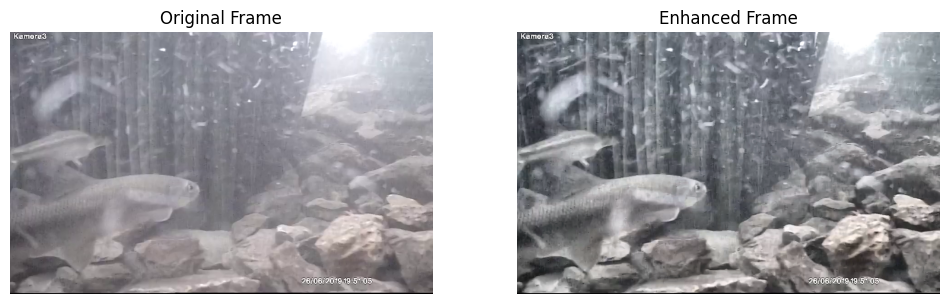

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class AdaptiveColorBalance:
    def __init__(self):
        self.low_values = None
        self.high_values = None

    def apply(self, image, clip_value=0.01, learn_rate=0.00005, preserve_shades=True):
        image = image.astype(np.float32)
        channels = cv2.split(image)
        balanced_channels = []

        if self.low_values is None or self.high_values is None:
            self.low_values = np.percentile(image, clip_value * 100, axis=(0, 1))
            self.high_values = np.percentile(image, (1 - clip_value) * 100, axis=(0, 1))

        for i, channel in enumerate(channels):
            low_val = np.percentile(channel, clip_value * 100)
            high_val = np.percentile(channel, (1 - clip_value) * 100)

            self.low_values[i] = (1 - learn_rate) * self.low_values[i] + learn_rate * low_val
            self.high_values[i] = (1 - learn_rate) * self.high_values[i] + learn_rate * high_val

            if self.low_values[i] >= self.high_values[i]:
                self.low_values[i] = max(0, self.high_values[i] - 5)
                self.high_values[i] = min(255, self.low_values[i] + 5)

            if preserve_shades:
                balanced = (channel - self.low_values[i]) / (self.high_values[i] - self.low_values[i] + 1e-6)
                balanced = balanced * 255
                balanced = np.clip(balanced, 0, 255).astype(np.uint8)
            else:
                balanced = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            balanced_channels.append(balanced)

        return cv2.merge(balanced_channels)

# === VIDEO PROCESSING ===

input_video_path = "/content/Kamera3_20190626195059.avi"
output_video_path = "/content/output_balanced_video.mp4"
target_frame = 150  # Frame number to save and display

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("❌ Error: Cannot open video file.")
else:
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    adaptive_balancer = AdaptiveColorBalance()
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    frame_count = 0
    saved_frame = None
    saved_input = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        input_frame = frame.copy()

        # Step 1: Adaptive Color Balancing
        balanced_frame = adaptive_balancer.apply(frame, clip_value=0.005, learn_rate=0.001)

        # Step 2: CLAHE enhancement
        lab = cv2.cvtColor(balanced_frame, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        l_clahe = clahe.apply(l)
        lab_clahe = cv2.merge((l_clahe, a, b))
        contrast_enhanced = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

        # Save target frame comparison
        if frame_count == target_frame:
            saved_input = input_frame
            saved_frame = contrast_enhanced
            combined = np.hstack((input_frame, contrast_enhanced))
            cv2.imwrite("/content/frame_comparison.jpg", combined)
            print("✅ Saved comparison frame to: /content/frame_comparison.jpg")

        out.write(contrast_enhanced)

        frame_count += 1
        if frame_count % 100 == 0:
            print(f"✅ Processed {frame_count} frames...")

    cap.release()
    out.release()
    print("🎉 Video processing complete. Output saved to:", output_video_path)

    # Display with matplotlib
    if saved_input is not None and saved_frame is not None:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(saved_input, cv2.COLOR_BGR2RGB))
        plt.title("Original Frame")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(saved_frame, cv2.COLOR_BGR2RGB))
        plt.title("Enhanced Frame")
        plt.axis("off")

        plt.show()


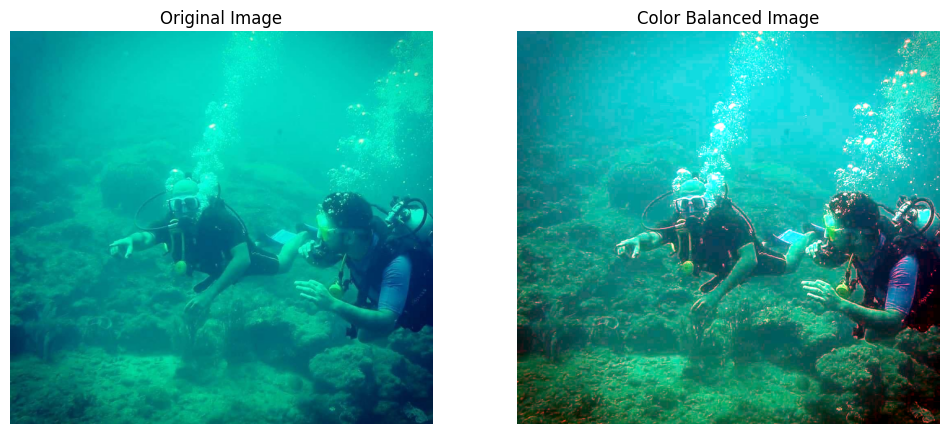

In [ ]:

# Load an image
image_path = "/content/736.jpg"  # Change this to your actual image file
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found! Check the filename.")
else:
    # Apply adaptive color balance with smooth shade preservation
    adaptive_balancer = AdaptiveColorBalance()
    adaptive_balanced_image = adaptive_balancer.apply(image, clip_value=0.01, learn_rate=0.001, preserve_shades=True)

    # Convert images to RGB for proper display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    adaptive_balanced_image_rgb = cv2.cvtColor(adaptive_balanced_image, cv2.COLOR_BGR2RGB)

    # Display the original and adaptive balanced images side by side
    plt.figure(figsize=(12, 6))

    # Display input image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Display output image
    plt.subplot(1, 2, 2)
    plt.imshow(adaptive_balanced_image_rgb)
    plt.title("Color Balanced Image")
    plt.axis("off")

    plt.show()


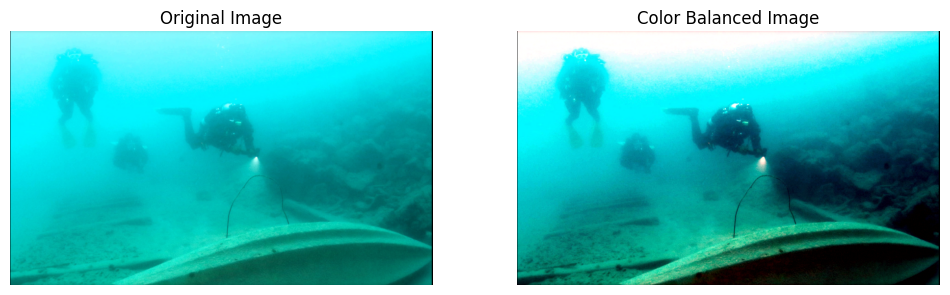

In [ ]:

# Load an image
image_path = "/content/4.PNG"  # Change this to your actual image file
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found! Check the filename.")
else:
    # Apply adaptive color balance with smooth shade preservation
    adaptive_balancer = AdaptiveColorBalance()
    adaptive_balanced_image = adaptive_balancer.apply(image, clip_value=0.05, learn_rate=0.00005, preserve_shades=True)

    # Convert images to RGB for proper display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    adaptive_balanced_image_rgb = cv2.cvtColor(adaptive_balanced_image, cv2.COLOR_BGR2RGB)

    # Display the original and adaptive balanced images side by side
    plt.figure(figsize=(12, 6))

    # Display input image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Display output image
    plt.subplot(1, 2, 2)
    plt.imshow(adaptive_balanced_image_rgb)
    plt.title("Color Balanced Image")
    plt.axis("off")

    plt.show()


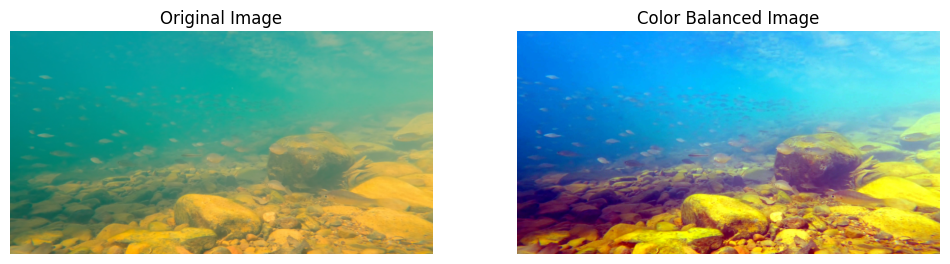

In [ ]:

# Load an image
image_path = "/content/45.PNG"  # Change this to your actual image file
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found! Check the filename.")
else:
    # Apply adaptive color balance with smooth shade preservation
    adaptive_balancer = AdaptiveColorBalance()
    adaptive_balanced_image = adaptive_balancer.apply(image, clip_value=0.02, learn_rate=0.00005, preserve_shades=True)

    # Convert images to RGB for proper display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    adaptive_balanced_image_rgb = cv2.cvtColor(adaptive_balanced_image, cv2.COLOR_BGR2RGB)

    # Display the original and adaptive balanced images side by side
    plt.figure(figsize=(12, 6))

    # Display input image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Display output image
    plt.subplot(1, 2, 2)
    plt.imshow(adaptive_balanced_image_rgb)
    plt.title("Color Balanced Image")
    plt.axis("off")

    plt.show()


In [ ]:
def dehaze(image):
    """
    Applies a basic dehazing method using Dark Channel Prior.
    :param image: Input image (BGR).
    :return: Dehazed image.
    """
    # Convert image to floating point for precision
    image = image.astype(np.float32) / 255.0

    # Convert to YUV color space for easier processing of brightness
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    y_channel = yuv[:, :, 0]  # Luminance (brightness)

    # Compute the dark channel (minimum of R, G, B channels)
    dark_channel = np.min(image, axis=2)

    # Estimate atmospheric light (value in bright areas)
    atmospheric_light = np.max(dark_channel)

    # Estimate transmission map (for dehazing)
    transmission = 1 - 0.9 * dark_channel / atmospheric_light
    transmission = cv2.GaussianBlur(transmission, (15, 15), 0)

    # Broadcast the transmission map to 3 channels to match the image dimensions
    transmission = np.expand_dims(transmission, axis=-1)
    transmission = np.repeat(transmission, 3, axis=-1)  # Repeat across all channels

    # Recover the scene radiance
    t = np.maximum(transmission, 0.1)  # Ensure no division by zero
    dehazed_image = (image - atmospheric_light) / t + atmospheric_light
    dehazed_image = np.clip(dehazed_image, 0, 1) * 255

    return dehazed_image.astype(np.uint8)


In [ ]:
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("❌ Error: Cannot open video file.")
else:
    print("✅ Video file loaded successfully.")


✅ Video file loaded successfully.


In [ ]:
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to grab frame.")
        break

    frame_count += 1
    print(f"✅ Frame {frame_count} read successfully.")

    # Continue with processing...


✅ Frame 1 read successfully.
✅ Frame 2 read successfully.
✅ Frame 3 read successfully.
✅ Frame 4 read successfully.
✅ Frame 5 read successfully.
✅ Frame 6 read successfully.
✅ Frame 7 read successfully.
✅ Frame 8 read successfully.
✅ Frame 9 read successfully.
✅ Frame 10 read successfully.
✅ Frame 11 read successfully.
✅ Frame 12 read successfully.
✅ Frame 13 read successfully.
✅ Frame 14 read successfully.
✅ Frame 15 read successfully.
✅ Frame 16 read successfully.
✅ Frame 17 read successfully.
✅ Frame 18 read successfully.
✅ Frame 19 read successfully.
✅ Frame 20 read successfully.
✅ Frame 21 read successfully.
✅ Frame 22 read successfully.
✅ Frame 23 read successfully.
✅ Frame 24 read successfully.
✅ Frame 25 read successfully.
✅ Frame 26 read successfully.
✅ Frame 27 read successfully.
✅ Frame 28 read successfully.
✅ Frame 29 read successfully.
✅ Frame 30 read successfully.
✅ Frame 31 read successfully.
✅ Frame 32 read successfully.
✅ Frame 33 read successfully.
✅ Frame 34 read suc

✅ Video loaded successfully. Total frames: 150
✅ Frame 1 read successfully.
✅ Frame 2 read successfully.
✅ Frame 3 read successfully.
✅ Frame 4 read successfully.
✅ Frame 5 read successfully.
✅ Frame 6 read successfully.
✅ Frame 7 read successfully.
✅ Frame 8 read successfully.
✅ Frame 9 read successfully.
✅ Frame 10 read successfully.
✅ Frame 11 read successfully.
✅ Frame 12 read successfully.
✅ Frame 13 read successfully.
✅ Frame 14 read successfully.
✅ Frame 15 read successfully.
✅ Frame 16 read successfully.
✅ Frame 17 read successfully.
✅ Frame 18 read successfully.
✅ Frame 19 read successfully.
✅ Frame 20 read successfully.


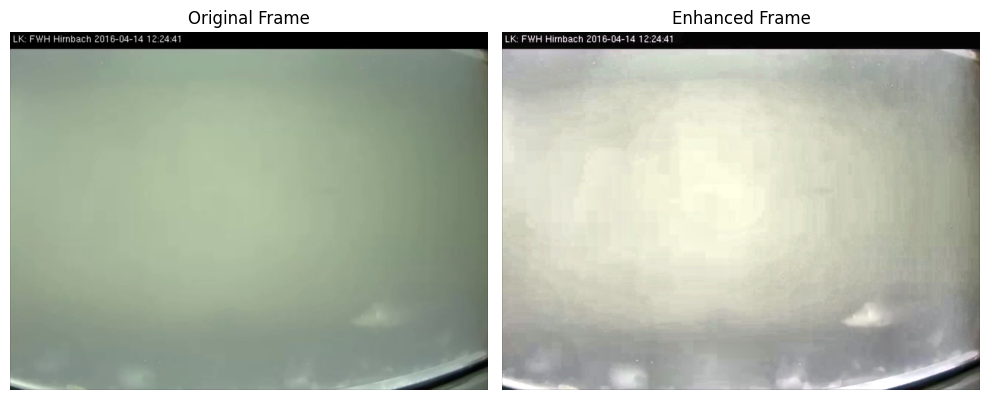

✅ Frame 21 read successfully.
✅ Frame 22 read successfully.
✅ Frame 23 read successfully.
✅ Frame 24 read successfully.
✅ Frame 25 read successfully.
✅ Frame 26 read successfully.
✅ Frame 27 read successfully.
✅ Frame 28 read successfully.
✅ Frame 29 read successfully.
✅ Frame 30 read successfully.


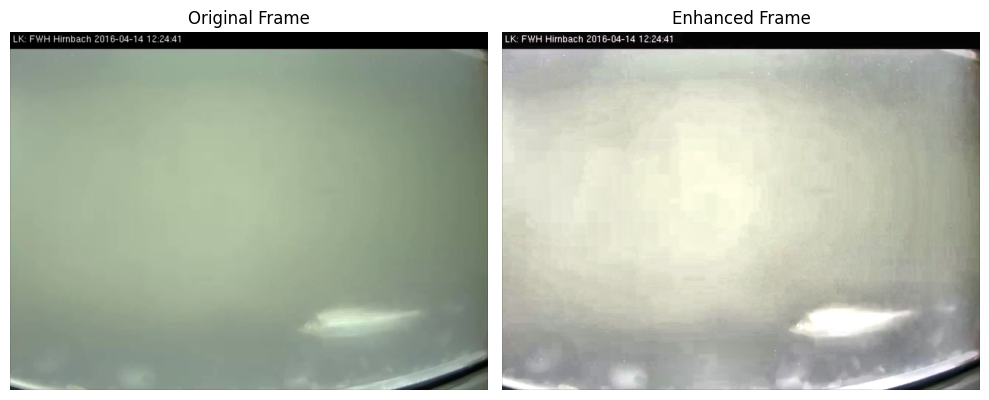

✅ Frame 31 read successfully.
✅ Frame 32 read successfully.
✅ Frame 33 read successfully.
✅ Frame 34 read successfully.
✅ Frame 35 read successfully.
✅ Frame 36 read successfully.
✅ Frame 37 read successfully.
✅ Frame 38 read successfully.
✅ Frame 39 read successfully.
✅ Frame 40 read successfully.


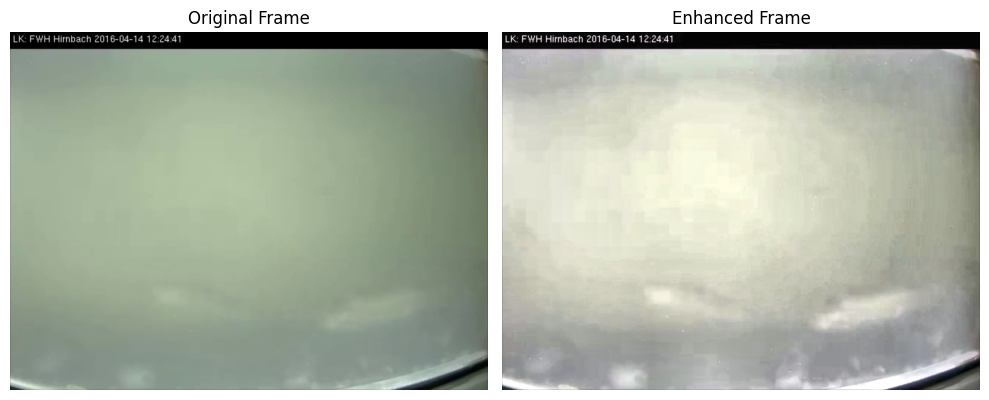

✅ Frame 41 read successfully.
✅ Frame 42 read successfully.
✅ Frame 43 read successfully.
✅ Frame 44 read successfully.
✅ Frame 45 read successfully.
✅ Frame 46 read successfully.
✅ Frame 47 read successfully.
✅ Frame 48 read successfully.
✅ Frame 49 read successfully.
✅ Frame 50 read successfully.


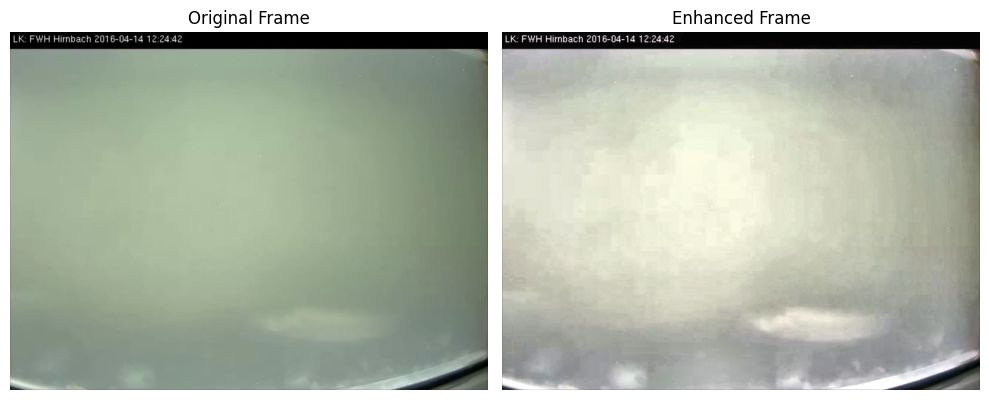

✅ Frame 51 read successfully.
✅ Frame 52 read successfully.
✅ Frame 53 read successfully.
✅ Frame 54 read successfully.
✅ Frame 55 read successfully.
✅ Frame 56 read successfully.
✅ Frame 57 read successfully.
✅ Frame 58 read successfully.
✅ Frame 59 read successfully.
✅ Frame 60 read successfully.
✅ Frame 61 read successfully.
✅ Frame 62 read successfully.
✅ Frame 63 read successfully.
✅ Frame 64 read successfully.
✅ Frame 65 read successfully.
✅ Frame 66 read successfully.
✅ Frame 67 read successfully.
✅ Frame 68 read successfully.
✅ Frame 69 read successfully.
✅ Frame 70 read successfully.
✅ Frame 71 read successfully.
✅ Frame 72 read successfully.
✅ Frame 73 read successfully.
✅ Frame 74 read successfully.
✅ Frame 75 read successfully.
✅ Frame 76 read successfully.
✅ Frame 77 read successfully.
✅ Frame 78 read successfully.
✅ Frame 79 read successfully.
✅ Frame 80 read successfully.
✅ Frame 81 read successfully.
✅ Frame 82 read successfully.
✅ Frame 83 read successfully.
✅ Frame 84

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class AdaptiveColorBalance:
    def __init__(self):
        self.low_values = None
        self.high_values = None

    def apply(self, image, clip_value=0.01, learn_rate=0.00005, preserve_shades=True):
        image = image.astype(np.float32)
        channels = cv2.split(image)
        balanced_channels = []

        if self.low_values is None or self.high_values is None:
            self.low_values = np.percentile(image, clip_value * 100, axis=(0, 1))
            self.high_values = np.percentile(image, (1 - clip_value) * 100, axis=(0, 1))

        for i, channel in enumerate(channels):
            low_val = np.percentile(channel, clip_value * 100)
            high_val = np.percentile(channel, (1 - clip_value) * 100)

            self.low_values[i] = (1 - learn_rate) * self.low_values[i] + learn_rate * low_val
            self.high_values[i] = (1 - learn_rate) * self.high_values[i] + learn_rate * high_val

            if self.low_values[i] >= self.high_values[i]:
                self.low_values[i] = max(0, self.high_values[i] - 5)
                self.high_values[i] = min(255, self.low_values[i] + 5)

            if preserve_shades:
                balanced = (channel - self.low_values[i]) / (self.high_values[i] - self.low_values[i] + 1e-6)
                balanced = balanced * 255
                balanced = np.clip(balanced, 0, 255).astype(np.uint8)
            else:
                balanced = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            balanced_channels.append(balanced)

        return cv2.merge(balanced_channels)


# === VIDEO PROCESSING ===

input_video_path = "/content/Jeff_Tubidity.mp4"       # ✅ Your input video path
output_video_path = "/content/output_balanced_video.mp4"  # ✅ Output path

cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("❌ Error: Cannot open video file.")
else:
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"✅ Video loaded successfully. Total frames: {total_frames}")

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    # Initialize processors
    adaptive_balancer = AdaptiveColorBalance()
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Contrast enhancer

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print(f"❌ Failed to grab frame at frame number {frame_count}. End of video reached.")
            break

        frame_count += 1
        print(f"✅ Frame {frame_count} read successfully.")

        # Step 1: Color balance
        balanced_frame = adaptive_balancer.apply(frame, clip_value=0.005, learn_rate=0.001)

        # Step 2: Convert to LAB and apply CLAHE to L channel
        lab = cv2.cvtColor(balanced_frame, cv2.COLOR_BGR2LAB)
        l, a, b = cv2.split(lab)
        l_clahe = clahe.apply(l)
        lab_clahe = cv2.merge((l_clahe, a, b))
        contrast_enhanced = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

        # Display the first frame input and output side by side
        if frame_count in [20,30,40,50]:  # Display only the first frame to keep it simple
            original_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            enhanced_rgb = cv2.cvtColor(contrast_enhanced, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(10, 4))
            plt.subplot(1, 2, 1)
            plt.imshow(original_rgb)
            plt.title("Original Frame")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(enhanced_rgb)
            plt.title("Enhanced Frame")
            plt.axis('off')

            plt.tight_layout()
            plt.show()

        # Step 3: Write the processed frame to output
        out.write(contrast_enhanced)

        if frame_count % 100 == 0:
            print(f"✅ Processed {frame_count} frames...")

    cap.release()
    out.release()
    print("🎉 Video processing complete. Output saved to:", output_video_path)


In [ ]:
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames in video: {total_frames}")


Total frames in video: 150


In [ ]:
# Convert BGR to RGB (if you're using OpenCV)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
balanced_image_rgb = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)  # Ensure `image_1` is correctly assigned

# Plot the images
plt.figure(figsize=(12, 6))

# Display input image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Display output image
plt.subplot(1, 2, 2)
plt.imshow(balanced_image_rgb)
plt.title("Color Balanced Image")
plt.axis("off")

(-0.5, 839.5, 630.5, -0.5)

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

class AdaptiveColorBalance:
    def __init__(self):
        # Instead of fixed initial values, start with None and initialize dynamically
        self.low_values = None
        self.high_values = None

    def apply(self, image, clip_value=0.01, learn_rate=0.00005, preserve_shades=True):
        """
        ✅ Improvements:
        - **Preserves color shades** using weighted adjustment.
        - **Adaptive learning without drastic changes.**
        - **Smooth transition instead of harsh normalization.**
        """
        image = image.astype(np.float32)  # Work in float space for better precision
        channels = cv2.split(image)
        balanced_channels = []

        # Initialize low/high values dynamically based on first image
        if self.low_values is None or self.high_values is None:
            self.low_values = np.percentile(image, clip_value * 100, axis=(0, 1))
            self.high_values = np.percentile(image, (1 - clip_value) * 100, axis=(0, 1))

        for i, channel in enumerate(channels):
            # Compute percentiles for dynamic contrast adjustment
            low_val = np.percentile(channel, clip_value * 100)
            high_val = np.percentile(channel, (1 - clip_value) * 100)

            # Soft update of low/high values (VERY slow to prevent drastic shifts)
            self.low_values[i] = (1 - learn_rate) * self.low_values[i] + learn_rate * low_val
            self.high_values[i] = (1 - learn_rate) * self.high_values[i] + learn_rate * high_val

            # Ensure low < high
            if self.low_values[i] >= self.high_values[i]:
                self.low_values[i] = max(0, self.high_values[i] - 5)
                self.high_values[i] = min(255, self.low_values[i] + 5)

            # Adjust colors with smooth contrast stretching
            if preserve_shades:
                balanced = (channel - self.low_values[i]) / (self.high_values[i] - self.low_values[i] + 1e-6)
                balanced = balanced * 255
                balanced = np.clip(balanced, 0, 255).astype(np.uint8)
            else:
                # Traditional normalization (more aggressive)
                balanced = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            balanced_channels.append(balanced)

        return cv2.merge(balanced_channels)


# Load an image
image_path = "/content/Capture.PNG"  # Change this to your actual image file
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found! Check the filename.")
else:
    # Apply adaptive color balance with smooth shade preservation
    adaptive_balancer = AdaptiveColorBalance()
    adaptive_balanced_image = adaptive_balancer.apply(image, clip_value=0.014, learn_rate=0.00005, preserve_shades=True)

    # Convert images to RGB for proper display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    adaptive_balanced_image_rgb = cv2.cvtColor(adaptive_balanced_image, cv2.COLOR_BGR2RGB)

    # Display the original and adaptive balanced images side by side
    plt.figure(figsize=(12, 6))

    # Display input image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Display output image
    plt.subplot(1, 2, 2)
    plt.imshow(adaptive_balanced_image_rgb)
    plt.title("Color Balanced Image")
    plt.axis("off")

    plt.show()


In [ ]:
# Define the sharpening kernel
# Load an image
image_path = "/content/Capture.PNG"  # Change this to your actual image file
image = cv2.imread(image_path)

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
# Stronger sharpening kernel
stronger_kernel = np.array([[0, -2, 0], [-2, 9, -2], [0, -2, 0]])

# Apply adaptive color balance with additional improvements
adaptive_balanced_image = adaptive_balancer.apply(image, clip_value=0.014, learn_rate=0.00005, preserve_shades=True)
# Upscale image
upscaled_image = cv2.resize(adaptive_balanced_image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_LINEAR)



# Display final results
cv2_imshow(upscaled_image )


In [ ]:
# Upscale image
upscaled_image = cv2.resize(adaptive_balanced_image, (image.shape[1]*2, image.shape[0]*2), interpolation=cv2.INTER_LINEAR)
# Sharpen image
sharpened_image = cv2.filter2D(denoised_image, -1, kernel)

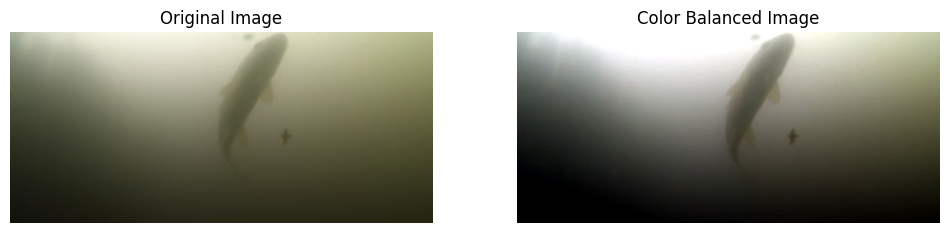

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

class AdaptiveColorBalance:
    def __init__(self):
        # Instead of fixed initial values, start with None and initialize dynamically
        self.low_values = None
        self.high_values = None

    def apply(self, image, clip_value=0.01, learn_rate=0.00005, preserve_shades=True):
        """
        ✅ Improvements:
        - **Preserves color shades** using weighted adjustment.
        - **Adaptive learning without drastic changes.**
        - **Smooth transition instead of harsh normalization.**
        """
        image = image.astype(np.float32)  # Work in float space for better precision
        channels = cv2.split(image)
        balanced_channels = []

        # Initialize low/high values dynamically based on first image
        if self.low_values is None or self.high_values is None:
            self.low_values = np.percentile(image, clip_value * 100, axis=(0, 1))
            self.high_values = np.percentile(image, (1 - clip_value) * 100, axis=(0, 1))

        for i, channel in enumerate(channels):
            # Compute percentiles for dynamic contrast adjustment
            low_val = np.percentile(channel, clip_value * 100)
            high_val = np.percentile(channel, (1 - clip_value) * 100)

            # Soft update of low/high values (VERY slow to prevent drastic shifts)
            self.low_values[i] = (1 - learn_rate) * self.low_values[i] + learn_rate * low_val
            self.high_values[i] = (1 - learn_rate) * self.high_values[i] + learn_rate * high_val

            # Ensure low < high
            if self.low_values[i] >= self.high_values[i]:
                self.low_values[i] = max(0, self.high_values[i] - 5)
                self.high_values[i] = min(255, self.low_values[i] + 5)

            # Adjust colors with smooth contrast stretching
            if preserve_shades:
                balanced = (channel - self.low_values[i]) / (self.high_values[i] - self.low_values[i] + 1e-6)
                balanced = balanced * 255
                balanced = np.clip(balanced, 0, 255).astype(np.uint8)
            else:
                # Traditional normalization (more aggressive)
                balanced = cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            balanced_channels.append(balanced)

        return cv2.merge(balanced_channels)


# Load an image
image_path = "/content/16.PNG"  # Change this to your actual image file
image = cv2.imread(image_path)

# Check if image is loaded correctly
if image is None:
    print("Error: Image not found! Check the filename.")
else:
    # Apply adaptive color balance with smooth shade preservation
    adaptive_balancer = AdaptiveColorBalance()
    adaptive_balanced_image = adaptive_balancer.apply(image, clip_value=0.05, learn_rate=0.00005, preserve_shades=True)

    # Convert images to RGB for proper display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    adaptive_balanced_image_rgb = cv2.cvtColor(adaptive_balanced_image, cv2.COLOR_BGR2RGB)

    # Display the original and adaptive balanced images side by side
    plt.figure(figsize=(12, 6))

    # Display input image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Display output image
    plt.subplot(1, 2, 2)
    plt.imshow(adaptive_balanced_image_rgb)
    plt.title("Color Balanced Image")
    plt.axis("off")

    plt.show()
